# Gen tables

In [2]:
%load_ext autoreload
%autoreload 2

from source.utils.plot import collect_gen_table
import matplotlib.pyplot as plt
import numpy as np
import jlc
import pandas as pd

In [3]:
r = ["input_scale","model_name","loss_weights","predict"]
table = collect_gen_table(gen_id_patterns="ent[512]_*",
                        record_from_args=r,
                        verbose=False)
#sort by max_ari
table = table.sort_values("max_ari",ascending=False)
table[["ari","max_ari"]+r]


,ari,max_ari,input_scale,model_name,loss_weights,predict
0,0.357,0.449,0.10,entity[sid2][input_scale_sweep],sigmoid_-4,x
0,0.346,0.437,0.30,entity[sid2][sigmoid_sweep],sigmoid_-4,x
0,0.345,0.437,0.20,entity[sid2][input_scale_sweep],sigmoid_-4,x
0,0.333,0.423,0.06,entity[sid2][input_scale_sweep],sigmoid_-4,x
0,0.335,0.422,0.30,entity[sid2][input_scale_sweep],sigmoid_-4,x
0,0.328,0.414,0.30,entity[sid2][sigmoid_sweep],sigmoid_-2,x
0,0.304,0.387,0.60,entity[sid2][input_scale_sweep],sigmoid_-4,x
0,0.299,0.383,0.30,entity[sid2][pred_lw_sweep],SNR_plus1,x
0,0.286,0.377,0.03,entity[sid2][input_scale_sweep],sigmoid_-4,x
0,0.278,0.364,0.30,entity[sid2][sigmoid_sweep],sigmoid_0,x


Text(0, 0.5, 'ARI')

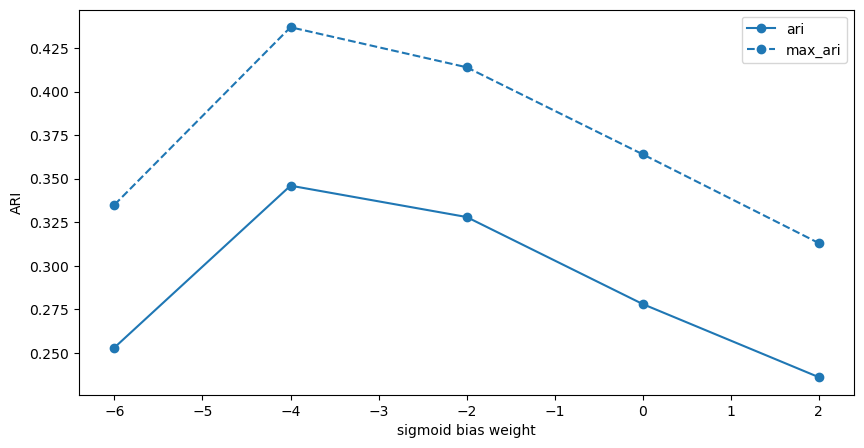

In [4]:
# plot ari and max_ari over sigmoid_sweep

mask = table["model_name"]=="entity[sid2][sigmoid_sweep]"

fig = plt.figure(figsize=(10,5))
x = table[mask]["loss_weights"].apply(lambda x: float(x.split("_")[-1])).values
x_order = np.argsort(x)
x = x[x_order]
plt.plot(x,table[mask]["ari"].values[x_order],"o-",label="ari",color="C0")
plt.plot(x,table[mask]["max_ari"].values[x_order],"o--",label="max_ari",color="C0")
plt.legend()
plt.xlabel("sigmoid bias weight")
plt.ylabel("ARI")

Text(0.5, 0, 'loss_weights')

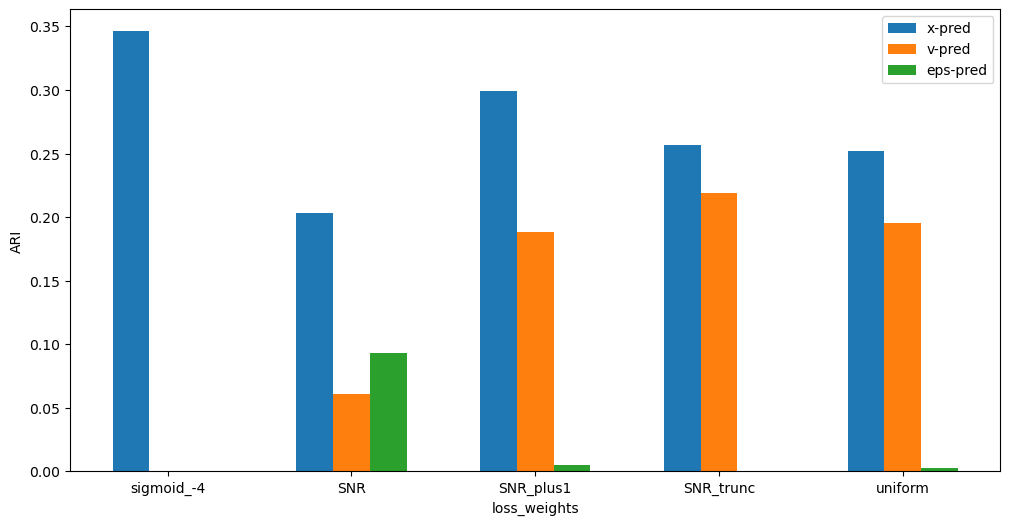

In [19]:
# plot ari and max_ari over pred and lw sweeps

fig = plt.figure(figsize=(12,6))
x_labels = ["sigmoid_-4","SNR","SNR_plus1","SNR_trunc","uniform"]
x = range(len(x_labels))
delta = 0.2
for k,predict in enumerate(["x","v","eps"]):
    y = [None for _ in x]
    for row in table.iterrows():
        correct_mn = row[1]["model_name"] in ["entity[sid2][sigmoid_sweep]", "entity[sid2][pred_lw_sweep]"]
        correct_x = row[1]["loss_weights"] in x_labels
        correct_p = row[1]["predict"]==predict
        #print(correct_mn,correct_x,correct_p)
        if correct_p and correct_mn and correct_x:
            pred = row[1]["predict"]
            x_idx = x_labels.index(row[1]["loss_weights"])
            y[x_idx] = row[1]["ari"]
    x_hat = np.array(x) + (k-1)*delta
    y_hat = np.array(y)
    #handle none
    x_hat,y_hat = x_hat[y_hat!=None],y_hat[y_hat!=None] 
    plt.bar(x_hat,y_hat,delta,label=predict+"-pred")
plt.legend()
plt.xticks(x,x_labels)
plt.ylabel("ARI")
plt.xlabel("loss_weights")
    

Text(0, 0.5, 'ARI')

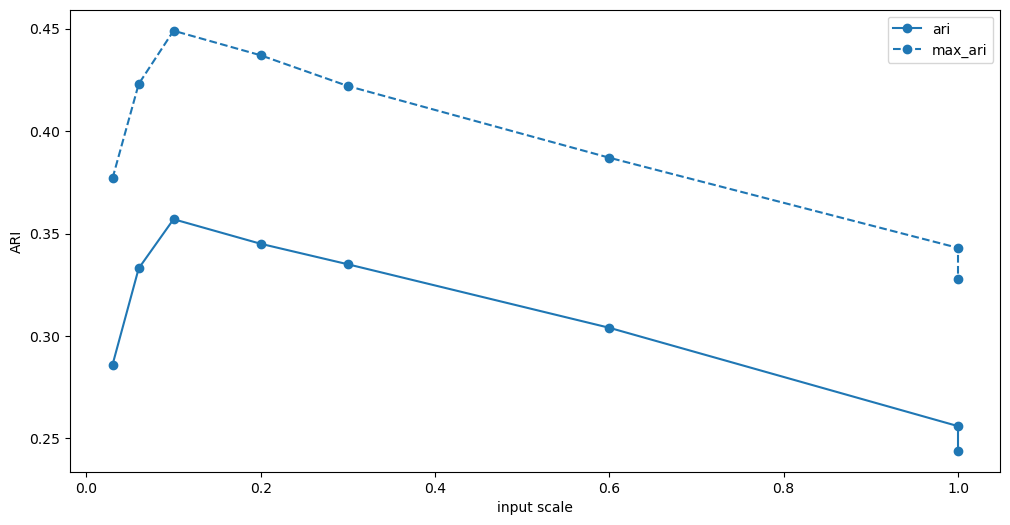

In [20]:
#plot ari and max_ari over input scale sweep

fig = plt.figure(figsize=(12,6))
mask = table["model_name"]=="entity[sid2][input_scale_sweep]"
x = table[mask]["input_scale"].values
x_order = np.argsort(x)
x = x[x_order]
plt.plot(x,table[mask]["ari"].values[x_order],"o-",label="ari",color="C0")
plt.plot(x,table[mask]["max_ari"].values[x_order],"o--",label="max_ari",color="C0")
plt.legend()
plt.xlabel("input scale")
plt.ylabel("ARI")

In [24]:
table = collect_gen_table(gen_id_patterns="ent[ts_sweep][64]_*",
                          model_id_patterns="entity[sid2][input_scale_sweep]_6",
                        record_from_sample_opts=["num_timesteps","sampler_type"],
                        include_mode="all",
                        verbose=False)
table

,ari,gen_id,gen_setup,hiou,iou,max_ari,max_hiou,step,num_timesteps,sampler_type,save_path
0,0.166,ent[ts_sweep][64]_0,ent[ts_sweep][64],0.044,0.002,0.224,0.053,50000.0,2.0,ddpm,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
1,0.202,ent[ts_sweep][64]_1,ent[ts_sweep][64],0.050,0.002,0.275,0.062,50000.0,2.0,ddim,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
2,0.269,ent[ts_sweep][64]_2,ent[ts_sweep][64],0.051,0.002,0.352,0.064,50000.0,5.0,ddpm,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
3,0.269,ent[ts_sweep][64]_3,ent[ts_sweep][64],0.052,0.002,0.345,0.065,50000.0,5.0,ddim,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
4,0.296,ent[ts_sweep][64]_4,ent[ts_sweep][64],0.053,0.002,0.375,0.068,50000.0,10.0,ddpm,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
5,0.288,ent[ts_sweep][64]_5,ent[ts_sweep][64],0.048,0.002,0.362,0.058,50000.0,10.0,ddim,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
6,0.332,ent[ts_sweep][64]_6,ent[ts_sweep][64],0.058,0.003,0.425,0.078,50000.0,20.0,ddpm,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
7,0.295,ent[ts_sweep][64]_7,ent[ts_sweep][64],0.046,0.002,0.364,0.054,50000.0,20.0,ddim,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
8,0.332,ent[ts_sweep][64]_8,ent[ts_sweep][64],0.060,0.002,0.430,0.078,50000.0,50.0,ddpm,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
9,0.288,ent[ts_sweep][64]_9,ent[ts_sweep][64],0.044,0.002,0.361,0.052,50000.0,50.0,ddim,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...


Text(0, 0.5, 'ARI')

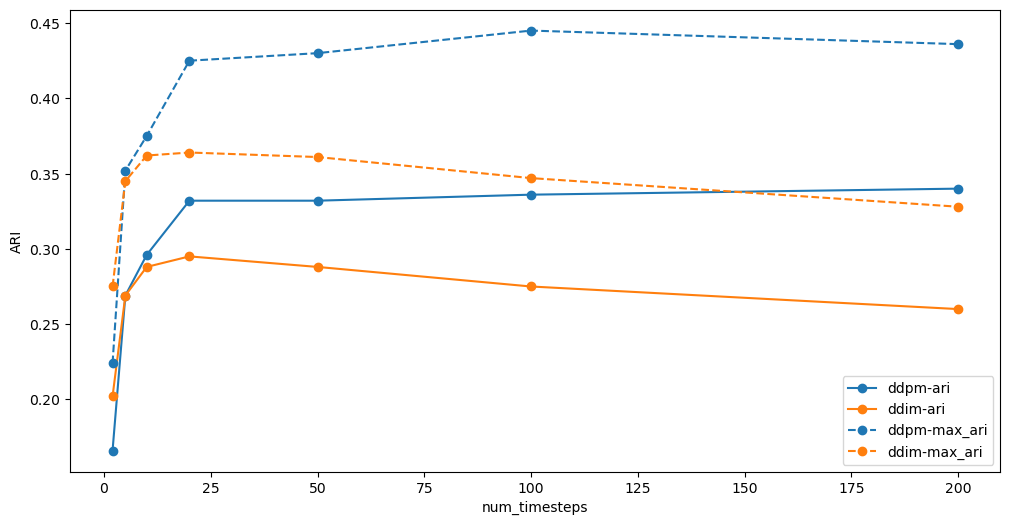

In [29]:
fig = plt.figure(figsize=(12,6))


for m in ["ari","max_ari"]:
    for sampler_type in table["sampler_type"].unique():
        mask = table["sampler_type"]==sampler_type
        x = table[mask]["num_timesteps"].values
        x_order = np.argsort(x)
        x = x[x_order]
        y = table[mask][m].values[x_order]
        plt.plot(x,y,
                 "o-" if m=="ari" else "o--",
                 label=f"{sampler_type}-{m}",
                 color="C0" if sampler_type=="ddpm" else "C1")
plt.legend()
plt.xlabel("num_timesteps")
plt.ylabel("ARI")

In [30]:
table = collect_gen_table(gen_id_patterns="ent[gw_sweep][64]_*",
                          model_id_patterns="entity[sid2][input_scale_sweep]_6",
                        record_from_sample_opts=["guidance_weight"],
                        include_mode="all",
                        verbose=False)
table

,ari,gen_id,gen_setup,hiou,iou,max_ari,max_hiou,step,guidance_weight,save_path
0,0.077,ent[gw_sweep][64]_0,ent[gw_sweep][64],0.034,0.003,0.150,0.051,50000.0,-1.0,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
1,0.297,ent[gw_sweep][64]_1,ent[gw_sweep][64],0.056,0.002,0.397,0.076,50000.0,-0.1,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
2,0.320,ent[gw_sweep][64]_2,ent[gw_sweep][64],0.057,0.002,0.413,0.077,50000.0,0.0,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
3,0.335,ent[gw_sweep][64]_3,ent[gw_sweep][64],0.058,0.002,0.425,0.078,50000.0,0.1,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
4,0.344,ent[gw_sweep][64]_4,ent[gw_sweep][64],0.057,0.003,0.432,0.073,50000.0,0.2,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
5,0.351,ent[gw_sweep][64]_5,ent[gw_sweep][64],0.057,0.002,0.437,0.071,50000.0,0.3,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
6,0.360,ent[gw_sweep][64]_6,ent[gw_sweep][64],0.057,0.002,0.443,0.072,50000.0,0.5,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
7,0.374,ent[gw_sweep][64]_7,ent[gw_sweep][64],0.056,0.002,0.457,0.068,50000.0,0.8,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
8,0.378,ent[gw_sweep][64]_8,ent[gw_sweep][64],0.055,0.002,0.461,0.066,50000.0,1.0,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
9,0.382,ent[gw_sweep][64]_9,ent[gw_sweep][64],0.054,0.002,0.462,0.063,50000.0,1.5,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...


Text(0, 0.5, 'ARI')

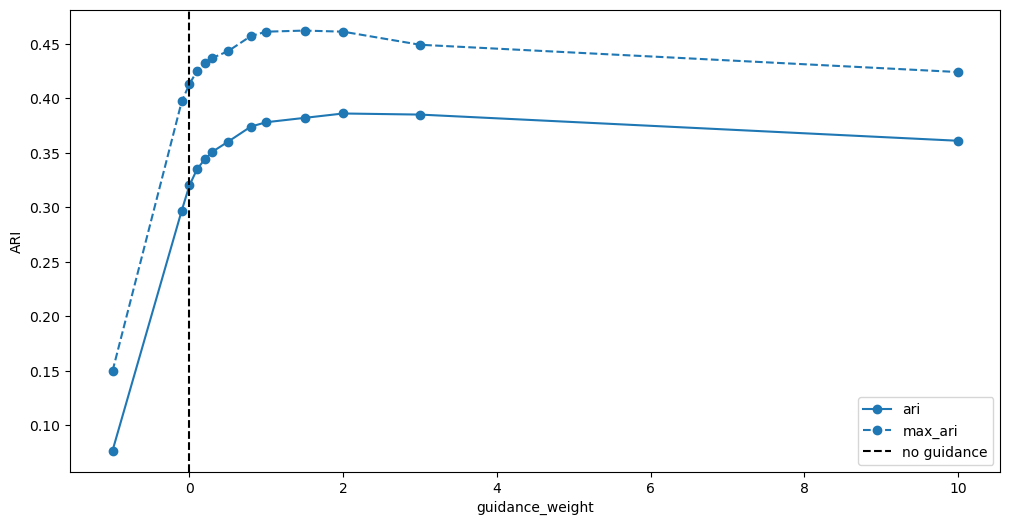

In [33]:
plt.figure(figsize=(12,6))
x = table["guidance_weight"].values
x_order = np.argsort(x)
x = x[x_order]

plt.plot(x,table["ari"].values[x_order],"o-",label="ari",color="C0")
plt.plot(x,table["max_ari"].values[x_order],"o--",label="max_ari",color="C0")
#get current ybounds
ymin,ymax = plt.gca().get_ylim()
plt.plot([0,0],[ymin,ymax],"k--",label="no guidance")
plt.ylim(ymin,ymax)
plt.legend()
plt.xlabel("guidance_weight")
plt.ylabel("ARI")


# Plot data overlay

In [ ]:
%load_ext autoreload
%autoreload 2
import os,sys
sys.path.append('./source/')
from sam import evaluate_sam
from eval_and_plotting import SavedSamples, SavedSamplesManager
import matplotlib.pyplot as plt
import argparse
import torch
import numpy as np
import jlc
from PIL import Image
eval_sam_kwargs = argparse.Namespace(datasets="",
                                    model_type=0,
                                    num_return_segments=16,
                                    split="vali",
                                    ratio_of_dataset=16,
                                    generator_kwargs={},
                                    pri_didx=["cityscapes/3050","cityscapes/3052"],
                                    longest_side_resize=1024,
                                    batch_size=4,
                                    postprocess_kwargs=None,
                                    full_resolution_decoder=True)
metrics_mean, light_data, heavy_data = evaluate_sam(**vars(eval_sam_kwargs))

In [ ]:
postprocess = False
sam_samples = SavedSamples(light_data=light_data,heavy_data=heavy_data)
if postprocess:
    sam_samples.postprocess({"mode": "min_area", "min_area": 0.005})

In [ ]:
didx = [sam_samples.didx[i] for i in [5,13,14,0]]
ssm = SavedSamplesManager(sam_samples)
im = ssm.plot_qual_seg(didx=didx,resize_width=1024,transpose=1,add_text_axis=0)
print(im.shape)

plt.figure(figsize=(15,5))
plt.imshow(im)

# Postprocess savedsamples

In [111]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os,sys
import numpy as np
from source.eval_and_plotting import DiffSamples, SavedSamples, SavedSamplesManager
sys.path.append('./source/')
import matplotlib.pyplot as plt

import jlc
import torch
import tqdm
import copy
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
ss2 = DiffSamples(gen_id="entopt[save]_1",is_ambiguous=False)
ss2.load_heavy_data()
ss2.load_heavy_image_gt()

In [113]:
ss2.crop_padding()

In [ ]:
pp_sweep = (np.linspace(0,0.5,10)**2).tolist()
pp_sweep = [round(pp,4) for pp in pp_sweep]

ssm = SavedSamplesManager()
for pp in tqdm.tqdm(pp_sweep):
    ss_pp = ss2.clone(f"pp={pp}")
    ss_pp.postprocess({"mode": "min_area", "min_area": pp})
    ssm.add_saved_samples(ss_pp)

In [45]:
uq = []
for i in range(len(ss_pp.heavy_data)):
    #find #uq in each segmentation
    segmentation = ss_pp.heavy_data[i][ss_pp.segment_key]
    uq.append(segmentation.unique().shape[0])
print(uq)

[57, 56, 18, 50, 54, 58, 50, 50, 47, 29, 49, 49, 49, 34, 58, 13, 56, 61, 31, 60, 54, 33, 62, 45, 43, 33, 19, 63, 23, 44, 53, 27, 56, 26, 45, 33, 30, 62, 36, 19, 27, 64, 45, 19, 19, 41, 42, 22, 35, 57, 53, 43, 31, 55, 39, 18, 16, 32, 53, 58, 63, 47, 27, 12]


In [36]:
ssm.mean_metric_table()

,pp=0.0,pp=0.0031,pp=0.0123,pp=0.0278,pp=0.0494,pp=0.0772,pp=0.1111,pp=0.1512
AP,3.22,12.1,13.9,15.6,15.5,15.2,14.8,12.8
AP50,6.64,21.9,24.9,27.5,27.2,26.0,25.7,23.5
AP75,2.65,10.7,12.2,13.6,14.5,14.8,13.8,12.0
ari,0.562,0.562,0.556,0.538,0.508,0.476,0.426,0.308
hiou,0.0894,0.249,0.271,0.27,0.253,0.238,0.225,0.194
iou,0.00192,0.00316,0.00357,0.00388,0.00455,0.0046,0.00476,0.00468


In [54]:
t = ssm.mean_metric_table()


['AP', 'AP50', 'AP75', 'ari', 'hiou', 'iou']

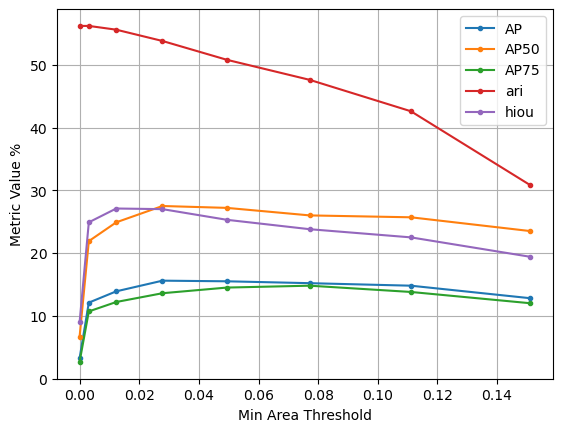

In [110]:
#t = ssm.mean_metric_table()

for k in t.index.tolist():
    if k!="iou":
        mult = 1 if k.startswith("AP") else 100
        plt.plot(pp_sweep[:8],mult*np.array(t.loc[k]).astype(float),".-",label=k)
plt.grid()
plt.ylabel("Metric Value %")
plt.xlabel("Min Area Threshold")
plt.legend()

In [114]:
from source.utils.metric_and_loss import ap_entity
ss2.postprocess({"mode": "min_area", "min_area": 0.04})

In [115]:
ssm = SavedSamplesManager(ss2)
ssm.mean_metric_table()

,entopt[save]_1
AP,0.153
AP50,0.267
AP75,0.136
ari,0.524
hiou,0.259
iou,0.00434


In [158]:
preds = []
gts = []

for i in range(len(ss2.heavy_data)):
    preds.append(ss2.heavy_data[i][ss2.segment_key])
    gts.append(torch.tensor(ss2.heavy_data[i]["gt"][:,:,0]))

out,save_dict = ap_entity(preds,gts,return_save_dict=True)
print(out)

{'AP': 0.03015605437307216, 'AP50': 0.08013184406204875, 'AP75': 0.017851046188362682}


Text(0.5, 1.0, 'Per-mask mean precision')

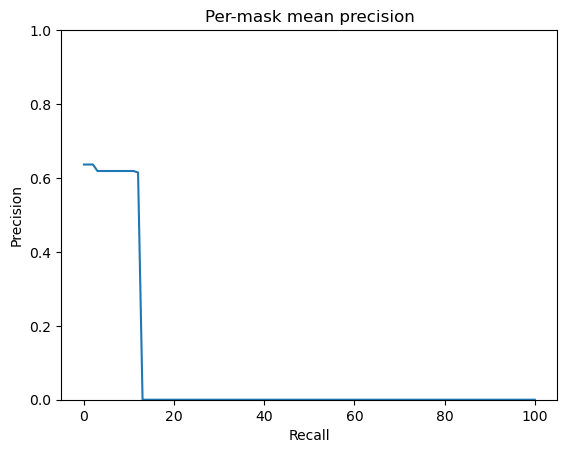

In [160]:
plt.plot(save_dict["eval"]["precision"][0])
plt.ylim(0,1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Per-mask mean precision")


In [163]:
out = {k: [] for k,v in out.items()}
pr = []
for pred,gt in zip(preds,gts):
    out_,save_dict = ap_entity(pred,gt,return_save_dict=1)
    pr.append(save_dict["eval"]["precision"][0])
    for k,v in out_.items():
        out[k].append(v)
print({k: np.mean(v) for k,v in out.items()})

{'AP': 0.16115563118811882, 'AP50': 0.27467512376237624, 'AP75': 0.13902124587458745}


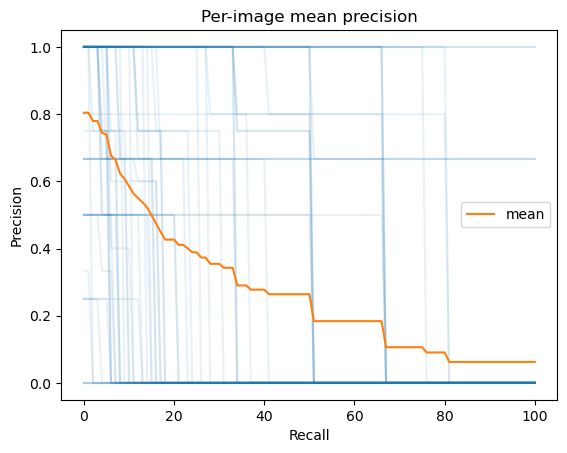

In [164]:
plt.plot(np.array(pr).T,color="C0",alpha=0.1);
plt.plot(np.mean(pr,axis=0),color="C1",label="mean")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Per-image mean precision")
plt.legend()

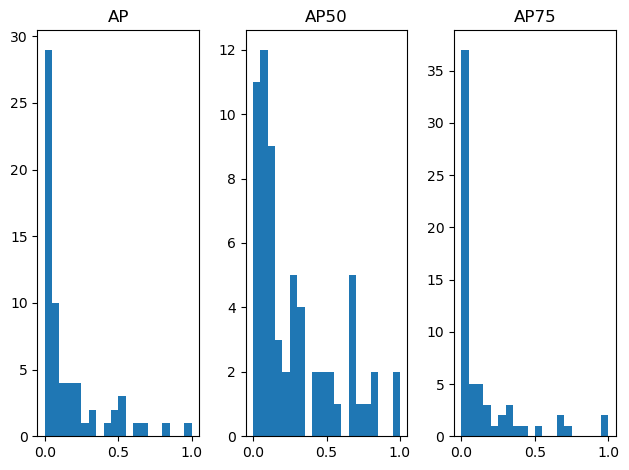

In [133]:
for i,k,v in zip(range(len(out)),out.keys(),out.values()):
    plt.subplot(1,len(out),i+1)
    plt.hist(v,bins=20)
    plt.title(k)
plt.tight_layout()

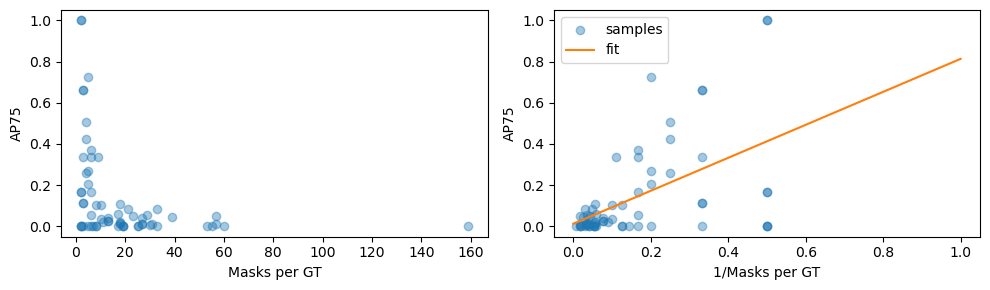

In [180]:
masks_per_gt = np.array([gt.unique().shape[0] for gt in gts]).astype(float)
k = "AP75"
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.scatter(masks_per_gt,out[k],alpha=0.4)
plt.ylabel(k)
plt.xlabel("Masks per GT")
plt.subplot(1,2,2)
plt.scatter(masks_per_gt**-1,out[k],alpha=0.4,label="samples")
plt.ylabel(k)
plt.xlabel("1/Masks per GT")
#plot fit line
plt.plot(np.linspace(0,1,100),np.poly1d(np.polyfit(masks_per_gt**-1,out[k],1))(np.linspace(0,1,100)),color="C1",label="fit")
plt.legend()
plt.tight_layout()

# Evaluate Cropformer

In [4]:
%load_ext autoreload
%autoreload 2
import os,sys
sys.path.append('./source/')
from sam import evaluate_sam
from eval_and_plotting import SavedSamples, SavedSamplesManager
import matplotlib.pyplot as plt
import argparse
import torch
import tqdm
import numpy as np
import jlc
from PIL import Image
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
entity_json = "data/entityseg/info.jsonl"
entity_info = jlc.load_json_to_dict_list(entity_json)
fn_to_didx = {}
for info in entity_info:
    if info["split_idx"]==2:
        fn_to_didx[info["fn"]] = f"entityseg/{info['i']}"
#first 5
#print({k:fn_to_didx[k] for k in list(fn_to_didx.keys())[:5]})

In [6]:
save_folder = "/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals"
save_paths = [str(item) for item in Path(save_folder).glob("*.pth")]
print("\n".join(save_paths))

/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/VAL_DATA_cropformer_swin_tiny_3x.pth
/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/VAL_DATA_mask2former_swin_tiny_3x.pth
/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/VAL_DATA_cropformer_swin_large_3x.pth
/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/VAL_DATA_mask2former_swin_large_3x.pth
/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/VAL_DATA_mask2former_hornet_3x.pth


In [36]:
#ssm = SavedSamplesManager()
for save_path in save_paths[2:]:

    setup_name = Path(save_path).stem

    heavy_data = []
    light_data = []
    didx = []

    loaded_eval = torch.load(save_path,weights_only=False)
    for item in loaded_eval:
        fn = "/".join(item["file_name"].split("/")[-2:])
        didx.append(fn_to_didx[fn])
        light_data.append({"scores": item["scores"].cpu()})
        heavy_data.append({"pred_int": item["seg"].cpu()})

    ss = SavedSamples(light_data=light_data,heavy_data=heavy_data,didx=didx)
    ss.recompute_metrics(tqdm_recompute=1)

    ss2 = ss.clone(setup_name)
    ss2.clear_heavy_data()
    ssm.add_saved_samples(ss2)

100%|██████████| 1314/1314 [17:30<00:00,  1.25it/s]


RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [37]:
ssm.mean_metric_table()

,VAL_DATA_cropformer_swin_tiny_3x,VAL_DATA_mask2former_swin_tiny_3x,VAL_DATA_cropformer_swin_large_3x,VAL_DATA_mask2former_swin_large_3x
AP,0.492,0.465,0.544,0.52
AP50,0.636,0.609,0.686,0.666
AP75,0.503,0.474,0.559,0.533
ari,0.862,0.856,0.884,0.88
hiou,0.247,0.23,0.293,0.257
iou,0.0357,0.0358,0.0484,0.0403


In [35]:
ssm.mean_metric_table()

,VAL_DATA_cropformer_swin_tiny_3x,VAL_DATA_mask2former_swin_tiny_3x
AP,0.492,0.465
AP50,0.636,0.609
AP75,0.503,0.474
ari,0.862,0.856
hiou,0.247,0.23
iou,0.0357,0.0358


In [12]:
save_path = save_paths[0]
setup_name = Path(save_path).stem

heavy_data = []
light_data = []
didx = []

loaded_eval = torch.load(save_path,weights_only=False)
for item in loaded_eval:
    fn = "/".join(item["file_name"].split("/")[-2:])
    didx.append(fn_to_didx[fn])
    light_data.append({"scores": item["scores"].cpu()})
    heavy_data.append({"pred_int": item["seg"].cpu().numpy().astype(np.uint8)[None,None]})

ss = SavedSamples(light_data=light_data,heavy_data=heavy_data,didx=didx)
ss.postprocess(postprocess_kwargs={"mode": "min_area","min_area": 0.025},tqdm_recompute=1)


100%|██████████| 1314/1314 [11:19<00:00,  1.93it/s]


In [13]:
ssm = SavedSamplesManager(ss)
ssm.mean_metric_table()

,unnamed
AP,0.397
AP50,0.476
AP75,0.41
ari,0.809
hiou,0.436
iou,0.1


In [8]:
jlc.shaprint(ss.heavy_data[0])

{'pred_int': 'torch.Size([753, 1333])'}


In [21]:

for didx in tqdm.tqdm(ss.didx):
    idx = int(didx.split("/")[1])
    image = torch.from_numpy(np.array(Image.open(f"data/entityseg/f{idx//1000}/{idx}_im.jpg")))
    label = torch.from_numpy(np.array(Image.open(f"data/entityseg/f{idx//1000}/{idx}_la.png")))
    h,w = image.shape[:2]
    assert h==ss.get_heavy_data(didx)[0]["pred_int"].shape[0]
    assert w==ss.get_heavy_data(didx)[0]["pred_int"].shape[1]
    ss.heavy_data[ss.didx.index(didx)]["gt"] = label
    ss.heavy_data[ss.didx.index(didx)]["im"] = image